In [80]:
import matplotlib.pyplot as plt


def print_graph(predicted, x_train, y_train_1, y_train_2):
    plt.clf()
    plt.plot(x_train, y_train_1, 'go', label='True data', alpha=0.5)
    plt.plot(x_train, y_train_2, 'go', color='red', label='True data', alpha=0.5)

    plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
    plt.legend(loc='best')
    plt.show()

In [81]:
import numpy as np
import torch
from helper_libs.shared.models.LinearRegression import LinearRegression

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
x_train = torch.from_numpy(x_train)

y_values_1 = [2*i + 1 for i in x_values]
y_train_1 = np.array(y_values_1, dtype=np.float32)
y_train_1 = y_train_1.reshape(-1, 1)
y_train_1 = torch.from_numpy(y_train_1)

y_values_2 = [0.5*i + 0.5 for i in x_values]
y_train_2 = np.array(y_values_2, dtype=np.float32)
y_train_2 = y_train_2.reshape(-1, 1)
y_train_2 = torch.from_numpy(y_train_2)

#TODO: Properly Federate Data
data_federation = [[x_train, y_train_1], [x_train, y_train_2]]

in_layer = 1
out_layer = 1
optimizer = "SGD"
criterion = "MSELoss"
starting_model = LinearRegression(in_layer, out_layer)
epochs = 50
learn_rate = 0.01

### Starting Model

/tmp/ipykernel_1959/658178070.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_train, y_train_2, 'go', color='red', label='True data', alpha=0.5)


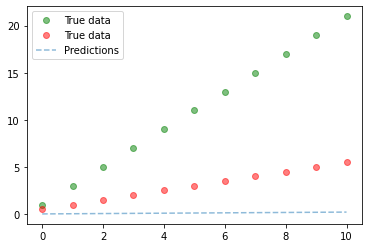

In [82]:
print_graph(starting_model(data_federation[0][0]).data.numpy(), x_train, y_train_1, y_train_2)

### Single Trained Model

/tmp/ipykernel_1959/658178070.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_train, y_train_2, 'go', color='red', label='True data', alpha=0.5)


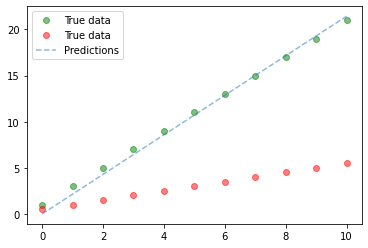

In [83]:
from sail_safe_functions.machine_learning.ModelTrain import ModelTrain
from helper_libs.scn_side.machine_learning.ModelUtility import ModelUtility

#Train a single model on a single SCN
trained_model= ModelTrain.run(epochs, data_federation[0], learn_rate, starting_model, criterion, optimizer)
predicted = trained_model(x_train).data.numpy()

print_graph(predicted, x_train, y_train_1, y_train_2)


/tmp/ipykernel_1959/658178070.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_train, y_train_2, 'go', color='red', label='True data', alpha=0.5)


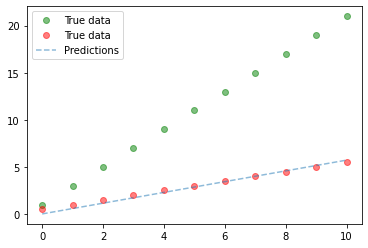

In [84]:
from sail_safe_functions.machine_learning.ModelTrain import ModelTrain

#Train a single model on a single SCN
trained_model= ModelTrain.run(epochs, data_federation[1], learn_rate, starting_model, criterion, optimizer)
predicted = trained_model(x_train).data.numpy()

print_graph(predicted, x_train, y_train_1, y_train_2)

In [85]:
from sail_safe_functions.machine_learning.ModelAverage import ModelAverage

trained_models = []
avg_model = trained_model

# Train a model with every member of our data federation
for j in range(len(data_federation)):
    trained_models.append(ModelTrain.run(epochs, data_federation[j], learn_rate, avg_model, criterion, optimizer))
avg_model = ModelAverage.run(trained_models)

avg_model.model.weight

Parameter containing:
tensor([[1.3571]], requires_grad=True)

### Retrieving Model from Parameters

In [86]:
from sail_safe_functions.machine_learning.ModelRetrieve import ModelRetrieve

#Retrieve Averaged Model
avg_model = ModelRetrieve.run(avg_model)

avg_model.model.weight

Parameter containing:
tensor([[1.3571]], requires_grad=True)

### Averaged Model

/tmp/ipykernel_1959/658178070.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_train, y_train_2, 'go', color='red', label='True data', alpha=0.5)


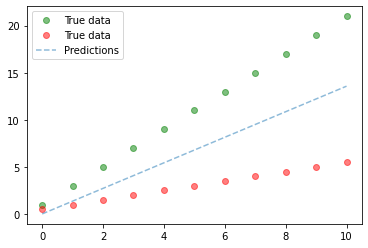

In [87]:
predictions = avg_model(x_train).data.numpy()
print_graph(predictions, x_train, y_train_1, y_train_2)